- What is hyper parameter
- How to tune and indentify optimal values for hyper parameters
- How to perform hyper parameter tuning in sklearn along with cross validation

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [3]:
ohe = pd.get_dummies(data.drop(columns=['age','bmi','children','charges']), drop_first=True) 

x = data.drop(columns='charges')
y = data['charges']

ohe_x = pd.concat([x, ohe], axis=1)
ohe_x = ohe_x.drop(columns=['sex','smoker','region'])
ohe_x.head()

age     bmi  children  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0         0           1                 0   
1   18  33.770         1         1           0                 0   
2   28  33.000         3         1           0                 0   
3   33  22.705         0         1           0                 1   
4   32  28.880         0         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0

In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(ohe_x, y, test_size = .2, random_state=3)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((1070, 8), (1070,), (268, 8), (268,))

In [5]:
model = DecisionTreeRegressor(max_depth=7).fit(xtrain, ytrain) 

- Hyper-parameter : A parameter which has to be tuned based on the data we have 
- E.g -> min_samples_leaf, min_samples_split, max_depth or 
- Criterions like -> gini-impurity, entropy
- max_depth is one of the hyper parameter 
- max_depth has to be defined otherwise tree will be very large & complicated coz it tries to split every node which leads to  overfitting
- In above case max_depth is assumed to be 7


In [6]:
ypred_test = model.predict(xtest)

print('RMSE: %.2f' % np.sqrt(mean_squared_error(ytest, ypred_test)))
print('R2_score: %.2f' % (r2_score(ytest, ypred_test)))


RMSE: 5108.59
R2_score: 0.83


# Ways to find hyper-parameter (max_depth) values
1st - **Grid Search CV**

### GridSearchCV

#### Tuning single hyper parameter

In [7]:
params = {'max_depth':list(range(2,20))} # specifying the range for max_depths to create multiple trees
params
#model = DecisionTreeRegressor(max_depth=7).fit(xtrain, ytrain) 

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

In [8]:
dtr = DecisionTreeRegressor()

gs = GridSearchCV(estimator=dtr, param_grid=params, scoring='r2', cv=5).fit(xtrain, ytrain)
##### Manual
gs.best_params_, gs.best_score_

({'max_depth': 4}, 0.8442256526379934)

In [9]:
# If we want to know results of R2 scores for other max_depths use -> cv_results_
df_cv_results = pd.DataFrame(gs.cv_results_)
df_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.005286      0.002338         0.003061        0.001082   
1       0.002023      0.000266         0.001187        0.000139   
2       0.001746      0.000135         0.001002        0.000070   
3       0.001757      0.000054         0.000966        0.000110   
4       0.001843      0.000058         0.000990        0.000080   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               2  {'max_depth': 2}           0.858603           0.821586   
1               3  {'max_depth': 3}           0.872395           0.840703   
2               4  {'max_depth': 4}           0.873399           0.847134   
3               5  {'max_depth': 5}           0.881857           0.840070   
4               6  {'max_depth': 6}           0.856937           0.836761   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.799544           0.832497           0.773684         0.817183   
1           0.829108           0.860875           0.813027         0.843222   
2           0.823459           0.863403           0.813734         0.844226   
3           0.821493           0.840154           0.812334         0.839181   
4           0.812115           0.824742           0.801584         0.826428   

   std_test_score  rank_test_score  
0        0.028889                5  
1        0.021354                2  
2        0.022752                1  
3        0.023902                3  
4        0.019300                4

In [10]:
df_cv_results.iloc[2]

mean_fit_time                0.001746
std_fit_time                 0.000135
mean_score_time              0.001002
std_score_time                0.00007
param_max_depth                     4
params               {'max_depth': 4}
split0_test_score            0.873399
split1_test_score            0.847134
split2_test_score            0.823459
split3_test_score            0.863403
split4_test_score            0.813734
mean_test_score              0.844226
std_test_score               0.022752
rank_test_score                     1
Name: 2, dtype: object

Above result has a rank of 1

In [11]:
df_cv_results.iloc[1]

mean_fit_time                0.002023
std_fit_time                 0.000266
mean_score_time              0.001187
std_score_time               0.000139
param_max_depth                     3
params               {'max_depth': 3}
split0_test_score            0.872395
split1_test_score            0.840703
split2_test_score            0.829108
split3_test_score            0.860875
split4_test_score            0.813027
mean_test_score              0.843222
std_test_score               0.021354
rank_test_score                     2
Name: 1, dtype: object

Above result has a rank of 2

####  By default we get only test scores but if we want training scores as well we need to add additional parameter 'return_train_score=True' 

In [12]:
gs = GridSearchCV(estimator=dtr, param_grid=params, scoring='r2', cv=5, return_train_score=True).fit(xtrain, ytrain)
gs.best_params_, gs.best_score_

({'max_depth': 4}, 0.8442256526379934)

In [13]:
df_cv_results = pd.DataFrame(gs.cv_results_)
df_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002145      0.000474         0.001264        0.000310   
1       0.001982      0.000424         0.001177        0.000334   
2       0.001916      0.000322         0.001044        0.000275   
3       0.001883      0.000393         0.001097        0.000287   
4       0.002263      0.000415         0.001138        0.000290   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               2  {'max_depth': 2}           0.858603           0.821586   
1               3  {'max_depth': 3}           0.872395           0.840703   
2               4  {'max_depth': 4}           0.873399           0.847134   
3               5  {'max_depth': 5}           0.882246           0.840070   
4               6  {'max_depth': 6}           0.856937           0.836761   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.799544           0.832497  ...         0.817183        0.028889   
1           0.829108           0.860875  ...         0.843222        0.021354   
2           0.823459           0.863403  ...         0.844226        0.022752   
3           0.821493           0.840154  ...         0.839259        0.024041   
4           0.811208           0.819717  ...         0.828749        0.016375   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.819417            0.827717   
1                2            0.850229            0.857754   
2                1            0.864101            0.869582   
3                3            0.876684            0.886134   
4                4            0.894145            0.901555   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.831257            0.824030            0.836846   
1            0.860768            0.852336            0.863762   
2            0.874635            0.869683            0.876017   
3            0.889776            0.883865            0.887722   
4            0.907257            0.898799            0.903020   

   mean_train_score  std_train_score  
0          0.827853         0.005971  
1          0.856970         0.005061  
2          0.870804         0.004231  
3          0.884836         0.004513  
4          0.900955         0.004367  

[5 rows x 21 columns]

# Plot mean train and test scores

In [14]:
mean_train_scores = df_cv_results['mean_train_score']
mean_test_scores   = df_cv_results['mean_test_score']
max_depths = df_cv_results['param_max_depth']

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


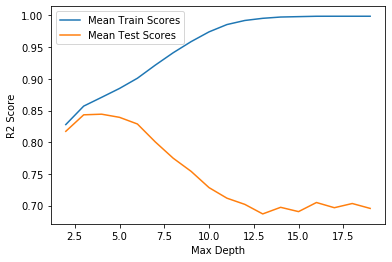

In [15]:
plt.plot(max_depths, mean_train_scores, label='Mean Train Scores')
plt.plot(max_depths, mean_test_scores, label ='Mean Test Scores')
plt.ylabel('R2 Score')
plt.xlabel('Max Depth')
plt.legend()

* Above chart implies how the train and test scores varies upon changes in max_depths
* max_depth below 4 could underfit 
* max_depth above 4 could overfit

##### Automatic

## Predicting best r2 score using test with best estimator

In [16]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=4)

In [17]:
ypred_test = gs.best_estimator_.predict(xtest)
print('R2 Score : %.2f' % r2_score(ytest, ypred_test))

R2 Score : 0.87
